# 📊 Report: International Airline Traffic Analysis (1985–2025)

In [33]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [34]:
# Load the dataset
file_path = r"D:\Code\Python\myProject\IMT\Codes\4- International_Airlines\soheib khaledian\city_pairs.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


Create Clean Date Column

In [35]:
# Build a clean monthly date using Year + Month_num
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month_num'], day=1),
    errors='raise'
)

df[['Month', 'Year', 'Month_num', 'Date']].head()

,Month,Year,Month_num,Date
0,Jan-85,1985,1,1985-01-01
1,Jan-85,1985,1,1985-01-01
2,Jan-85,1985,1,1985-01-01
3,Jan-85,1985,1,1985-01-01
4,Jan-85,1985,1,1985-01-01


In [36]:
monthly = (
    df.groupby('Date', as_index=False)[
        ['Passengers_In', 'Passengers_Out', 'Freight_In_(tonnes)', 'Freight_Out_(tonnes)']
    ]
    .sum()
)

monthly.head()

,Date,Passengers_In,Passengers_Out,Freight_In_(tonnes),Freight_Out_(tonnes)
0,1985-01-01,263795,208770,8052.874,7682.643
1,1985-02-01,204953,179222,9486.680,9016.229
2,1985-03-01,209513,231582,10864.416,11294.803
3,1985-04-01,182673,214403,9285.968,8916.993
4,1985-05-01,198902,224350,10069.178,9445.560


## Intro
This study analyzes international airline traffic between Australian ports and foreign destinations over the period **1985 to 2025**, focusing on passenger and freight movement, regional connectivity, and seasonal behavior. The analysis is based on aggregated monthly traffic volumes, route-level activity, and country-level trends. Multiple visualizations were used to evaluate long-term growth, short-term disruptions, and structural changes in the air transport network.

## Over Time Plots

### Trend Plot: Inbound vs Outbound (Passengers + Freight)

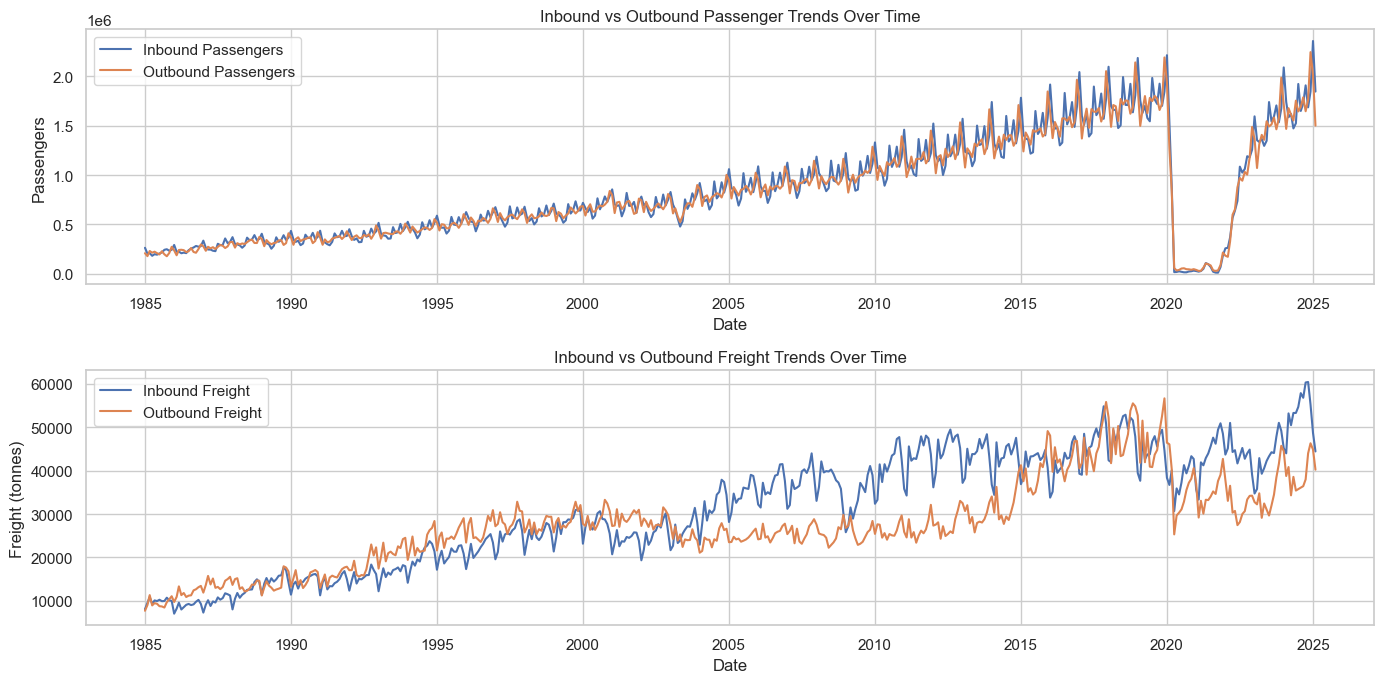

In [37]:
plt.figure(figsize=(14, 7))

# Passengers trend
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly, x='Date', y='Passengers_In', label='Inbound Passengers')
sns.lineplot(data=monthly, x='Date', y='Passengers_Out', label='Outbound Passengers')
plt.title('Inbound vs Outbound Passenger Trends Over Time')
plt.ylabel('Passengers')
plt.legend()

# Freight trend
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly, x='Date', y='Freight_In_(tonnes)', label='Inbound Freight')
sns.lineplot(data=monthly, x='Date', y='Freight_Out_(tonnes)', label='Outbound Freight')
plt.title('Inbound vs Outbound Freight Trends Over Time')
plt.ylabel('Freight (tonnes)')
plt.legend()

plt.tight_layout()
plt.show()

### Regional Trend: Top 5 Countries Over Time

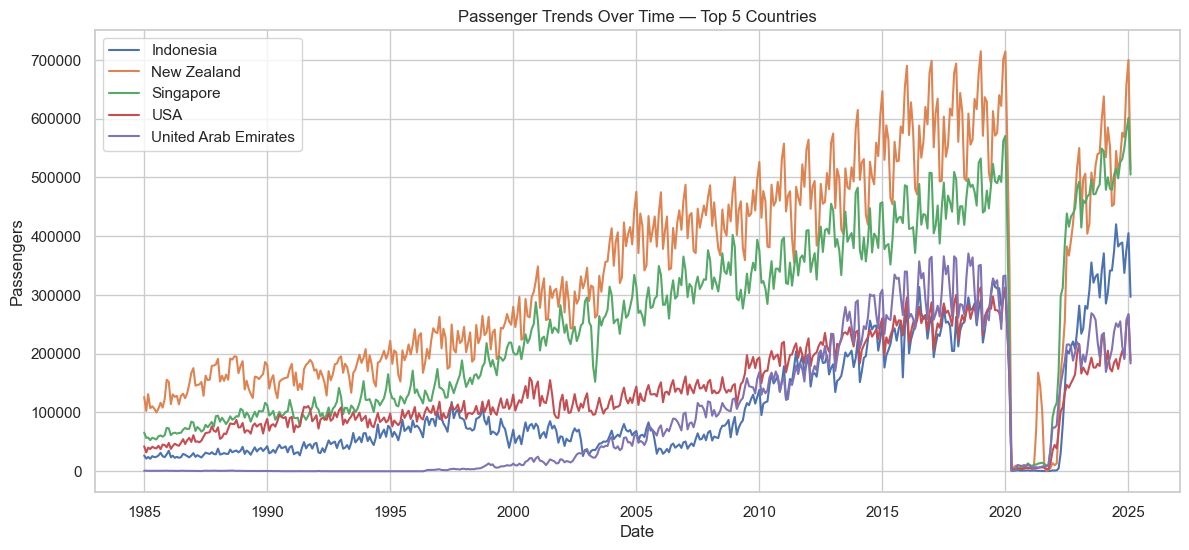

In [ ]:
top5_countries = (
    df.groupby('Country')['Passengers_Total']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

country_time = (
    df[df['Country'].isin(top5_countries)]
    .groupby(['Date','Country'], as_index=False)['Passengers_Total']
    .sum()
)

plt.figure(figsize=(14, 6))
sns.lineplot(data=country_time, x='Date', y='Passengers_Total', hue='Country')
plt.title('Passenger Trends Over Time — Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

### Inbound vs Outbound Balance (Net Flow + Ratio)

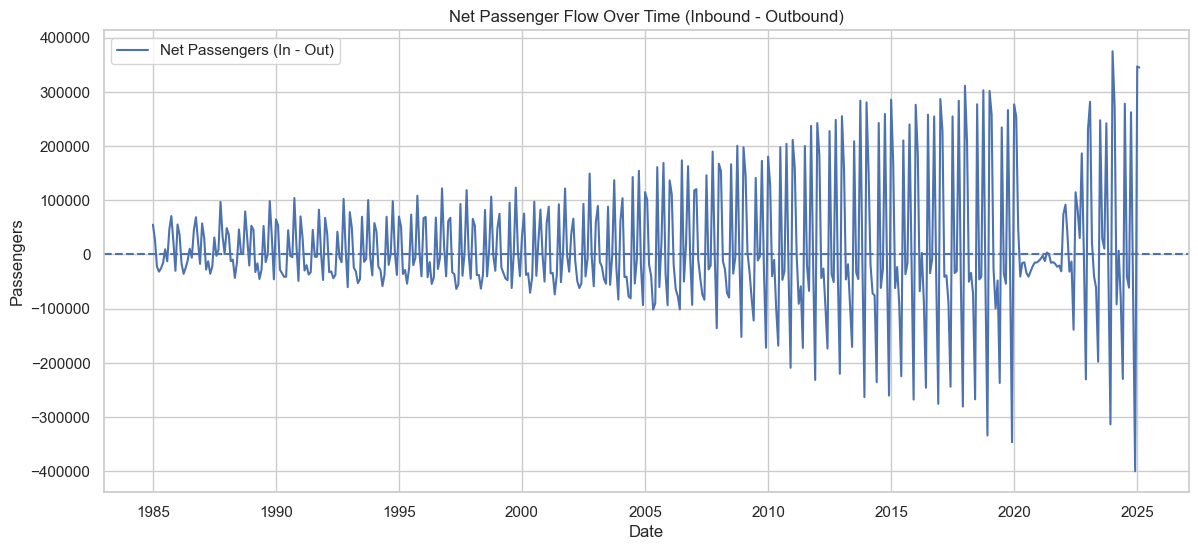

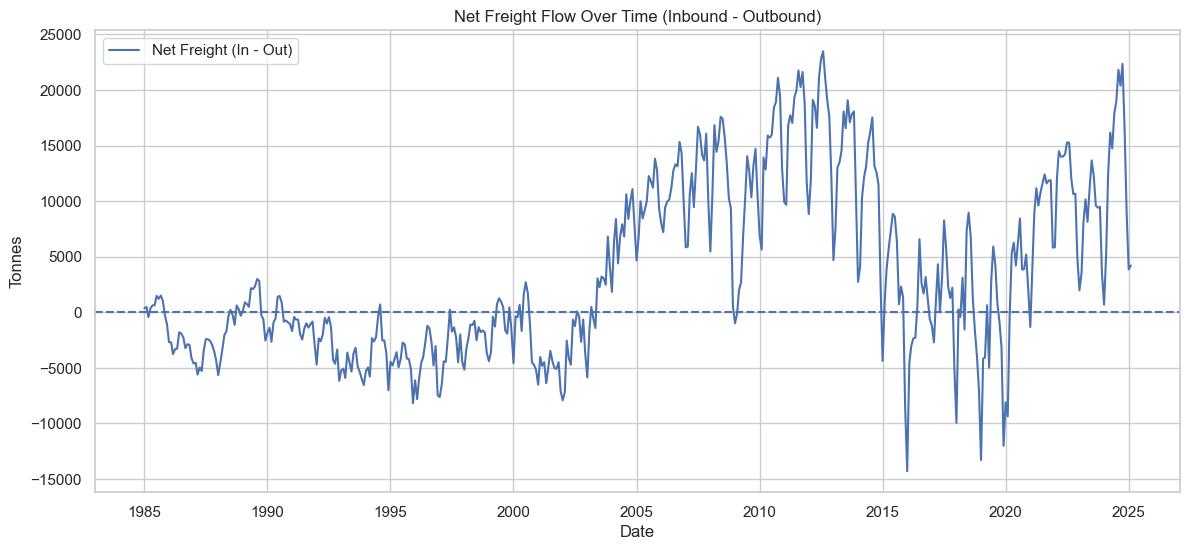

In [ ]:
net = monthly.copy()
net['Net_Passengers'] = net['Passengers_In'] - net['Passengers_Out']
net['Net_Freight'] = net['Freight_In_(tonnes)'] - net['Freight_Out_(tonnes)']

plt.figure(figsize=(14, 6))
sns.lineplot(data=net, x='Date', y='Net_Passengers', label='Net Passengers (In - Out)')
plt.axhline(0, linestyle='--')
plt.title('Net Passenger Flow Over Time (Inbound - Outbound)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=net, x='Date', y='Net_Freight', label='Net Freight (In - Out)')
plt.axhline(0, linestyle='--')
plt.title('Net Freight Flow Over Time (Inbound - Outbound)')
plt.xlabel('Date')
plt.ylabel('Tonnes')
plt.show()

### Seasonality Heatmap (Year × Month)

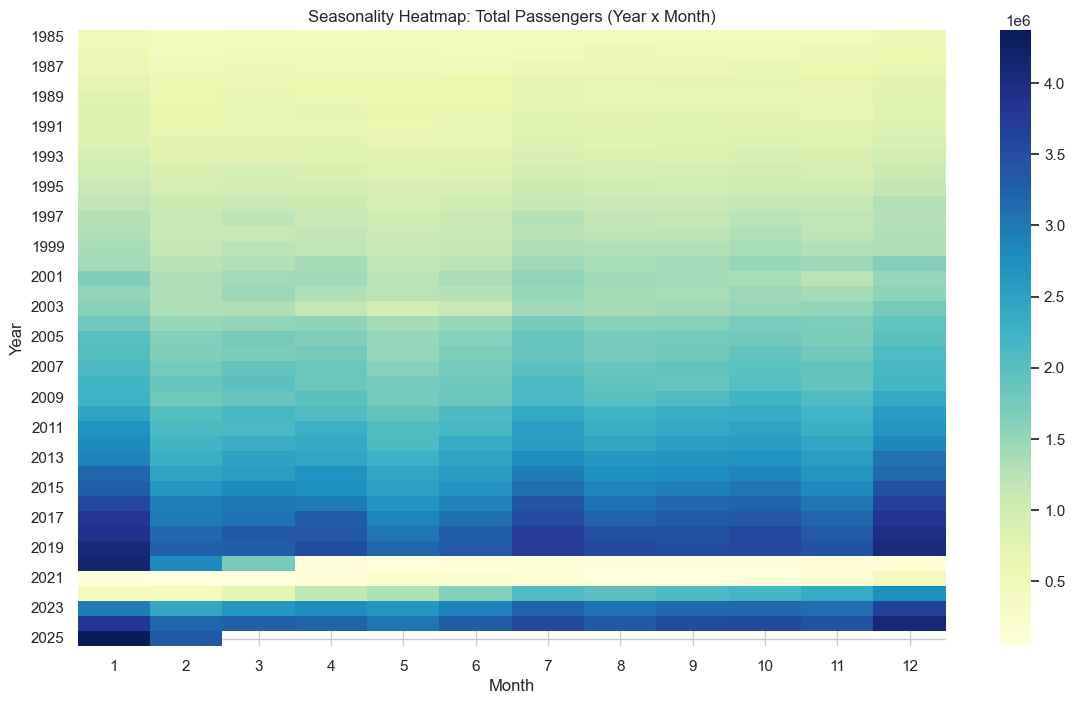

In [ ]:
df['Passengers_Total_Calc'] = df['Passengers_In'] + df['Passengers_Out']

heat_df = df.groupby(['Year','Month_num'])['Passengers_Total_Calc'].sum().reset_index()

pivot = heat_df.pivot(index='Year', columns='Month_num', values='Passengers_Total_Calc')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title('Seasonality Heatmap: Total Passengers (Year x Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### Route Diversity Over Time (How many active routes each month)

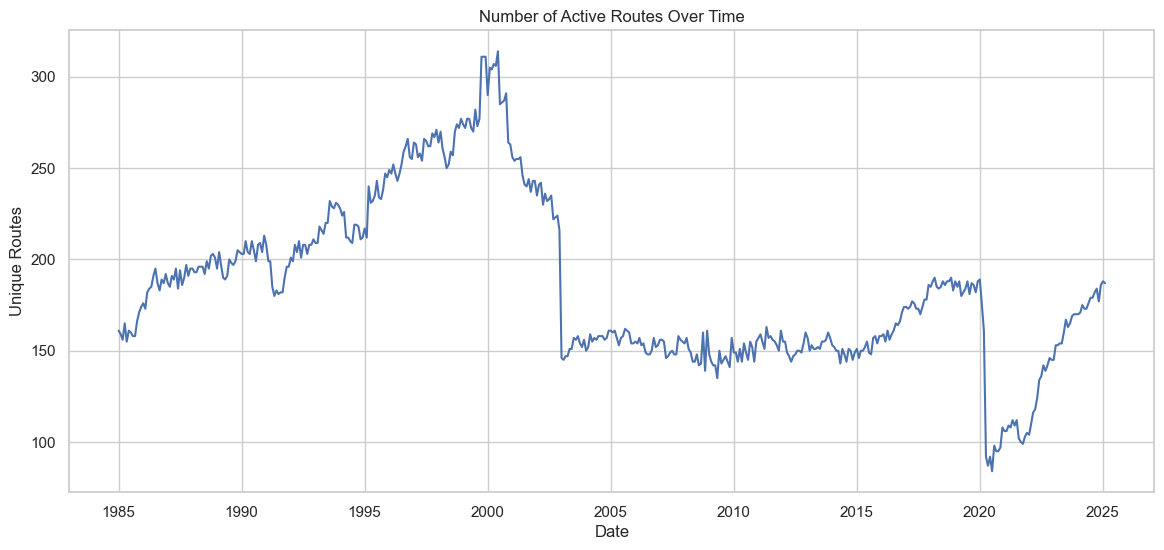

,Date,Active_Routes
0,1985-01-01,161
1,1985-02-01,159
2,1985-03-01,156
3,1985-04-01,165
4,1985-05-01,155


In [ ]:
routes_monthly = (
    df.groupby('Date')['Route']
    .nunique()
    .reset_index(name='Active_Routes')
)

plt.figure(figsize=(14, 6))
sns.lineplot(data=routes_monthly, x='Date', y='Active_Routes')
plt.title('Number of Active Routes Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Routes')
plt.show()

routes_monthly.head()

### Seasonality Line: Month-by-Month Total (Inbound vs Outbound)

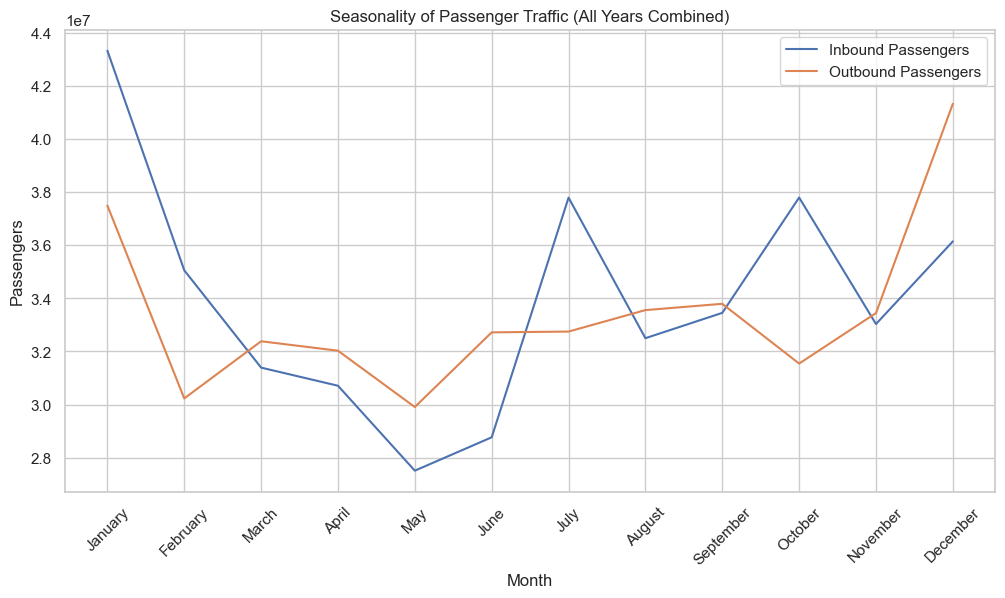

,Month_Name,Passengers_In,Passengers_Out
4,January,43323753,37492463
3,February,35054863,30231773
7,March,31391823,32383994
0,April,30709393,32028461
8,May,27512244,29908294
6,June,28768539,32718986
5,July,37791311,32749073
1,August,32499716,33557039
11,September,33452966,33793828
10,October,37794496,31544207


In [ ]:
monthly_pax = df.groupby('Date', as_index=False)[['Passengers_In','Passengers_Out']].sum()
monthly_pax['Month_Name'] = monthly_pax['Date'].dt.month_name()

seasonality_data = monthly_pax.groupby('Month_Name')[['Passengers_In','Passengers_Out']].sum().reset_index()

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

seasonality_data['Month_Name'] = pd.Categorical(seasonality_data['Month_Name'], categories=month_order, ordered=True)
seasonality_sorted = seasonality_data.sort_values('Month_Name')

plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonality_sorted, x='Month_Name', y='Passengers_In', label='Inbound Passengers')
sns.lineplot(data=seasonality_sorted, x='Month_Name', y='Passengers_Out', label='Outbound Passengers')
plt.title('Seasonality of Passenger Traffic (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.xticks(rotation=45)
plt.legend()
plt.show()

seasonality_sorted

## Overall Traffic Evolution and Impact of Global Events

The long-term trend of international passenger traffic shows a **consistent and strong increase from 1985 until 2019**, reflecting steady growth in tourism, globalization, and international business travel. Both inbound and outbound passenger volumes follow very similar trajectories, indicating a largely balanced flow of travelers into and out of Australia. This balance suggests that international mobility is driven by both tourism inflows and outbound travel demand from residents.

A dramatic and unprecedented decline in passenger traffic is observed during **2020–2021**, where volumes drop close to zero. This collapse corresponds directly with the **COVID-19 pandemic**, during which international borders were closed, flights were cancelled, and travel demand was suppressed by government restrictions and health concerns. The synchronized drop across all routes and countries confirms that the reduction in traffic was systemic rather than region-specific.

From **2022 onward**, passenger volumes begin to recover rapidly, indicating the gradual reopening of borders and restoration of airline routes. However, in many periods traffic has not fully returned to pre-pandemic peak levels, suggesting that full recovery is still ongoing and uneven across markets.

Freight traffic follows a different behavior pattern. While long-term growth is still present, freight volumes are less severely affected by the pandemic compared to passenger traffic. This reflects the essential nature of cargo transport for supply chains, medical supplies, and international trade, which continued even when passenger travel was restricted. This difference highlights the structural resilience of air cargo operations compared to passenger aviation.

---

## Net Flow and Balance Between Inbound and Outbound Traffic

Analysis of net passenger flow (inbound minus outbound) indicates that overall traffic is generally balanced, with regular oscillations around zero. These fluctuations increase in magnitude over time, which suggests that seasonal peaks became stronger as total traffic volumes grew. Larger economies of scale in air travel naturally produce stronger cyclical movements.

During the COVID-19 period, net passenger flow becomes irregular and unstable, reflecting abrupt policy-driven changes rather than normal market behavior. This further confirms that pandemic-related restrictions disrupted typical travel dynamics.

Net freight flow exhibits longer structural shifts, including periods where inbound freight dominates and others where outbound freight is higher. These changes likely reflect evolving trade patterns, manufacturing activity, and logistics strategies rather than tourism-driven effects. Increased volatility after 2015 may also be linked to the expansion of global e-commerce and supply chain restructuring.

---

## Regional Patterns and Country-Level Dynamics

Country-level trend analysis reveals that international travel demand is highly concentrated among a small number of key partner countries. **New Zealand consistently remains the dominant destination**, which is expected due to geographic proximity, strong tourism exchange, and close economic ties. Countries such as **Singapore and Indonesia** demonstrate strong long-term growth, indicating increasing importance of Southeast Asian travel corridors.

The **United States and United Arab Emirates** show more gradual increases, becoming more significant after 2010, likely driven by long-haul connectivity expansion and hub-based airline networks.

All major countries experience simultaneous traffic collapse during 2020–2021, reinforcing the conclusion that COVID-19 caused a global and synchronized disruption rather than isolated regional declines. Recovery patterns vary by country, suggesting differences in border policies, airline strategies, and travel demand rebound rates.

---

## Network Structure and Route Availability

Route-level analysis shows that the number of active international routes expanded steadily until the early 2000s, reflecting airline network growth and market liberalization. After this period, route diversity stabilized, indicating that airlines optimized networks rather than continuously expanding them.

A sharp contraction in active routes occurs during the pandemic, confirming that airlines not only reduced passenger volumes but also suspended entire connections. Post-2022 data shows gradual network rebuilding, though the number of routes has not yet fully returned to earlier peaks, suggesting ongoing structural adjustments in airline operations.

This indicates that pandemic effects were not limited to demand but also reshaped network planning and route economics.

---

## Seasonal Travel Behavior

Seasonality analysis demonstrates that passenger traffic follows stable and recurring annual patterns across decades. Travel demand peaks during:

* **January**, corresponding to summer holidays in Australia
* **July**, linked to mid-year travel periods
* **October and December**, associated with end-of-year holidays and international tourism

Lower traffic volumes are consistently observed during **May and June**, reflecting shoulder-season travel demand.

Heatmap visualization across years and months confirms that seasonality structure remains stable even as total volumes grow. The pandemic period is clearly visible as a sharp drop across all months, reinforcing the conclusion that travel behavior patterns did not fundamentally change — they were temporarily suppressed by external constraints.

---

## Key Findings

* International passenger traffic grew strongly over three decades before COVID-19.
* COVID-19 caused a historic collapse in international travel due to border closures.
* Freight transport was more resilient and less sensitive to travel restrictions.
* Travel flows between Australia and major partner countries remain highly concentrated.
* Airline route networks contracted sharply during the pandemic and are still recovering.
* Seasonal travel behavior is consistent and predictable across long time spans.

---

## Explanation for Low Passenger Exchange Period

The extremely low passenger volumes observed during **2020–2021** are primarily caused by the **COVID-19 pandemic**, which resulted in:

* International border closures
* Quarantine requirements
* Flight cancellations
* Reduced airline capacity
* Suppressed tourism and business travel demand

These factors collectively halted normal international mobility, leading to the lowest passenger exchange levels in the entire dataset.


## Port analyst

### Top 10 Australian Ports by Passenger Volume

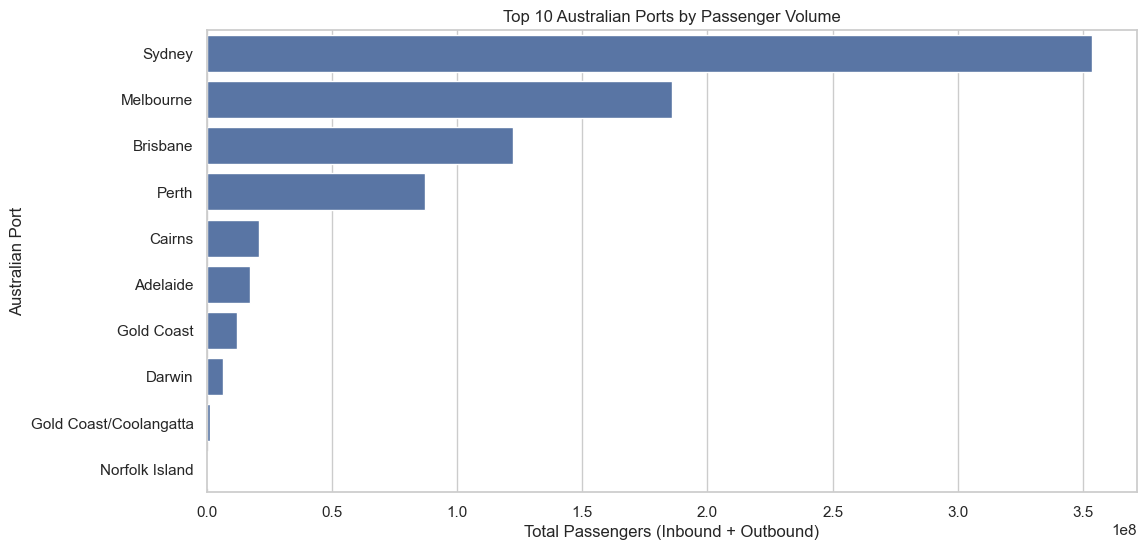

,AustralianPort,Passengers_In,Passengers_Out,Total_Passengers
16,Sydney,176673408,177093711,353767119
10,Melbourne,93911879,91791942,185703821
1,Brisbane,62348372,60049958,122398330
13,Perth,44275103,42826982,87102085
3,Cairns,10545686,10232814,20778500
0,Adelaide,8839359,8491878,17331237
7,Gold Coast,6140066,6016439,12156505
6,Darwin,3235849,3172067,6407916
8,Gold Coast/Coolangatta,629000,626075,1255075
12,Norfolk Island,263275,262858,526133


In [38]:
ports_traffic = df.groupby('AustralianPort')[['Passengers_In', 'Passengers_Out']].sum().reset_index()
ports_traffic['Total_Passengers'] = ports_traffic['Passengers_In'] + ports_traffic['Passengers_Out']
ports_top10 = ports_traffic.sort_values(by='Total_Passengers', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Passengers', y='AustralianPort', data=ports_top10)
plt.title('Top 10 Australian Ports by Passenger Volume')
plt.xlabel('Total Passengers (Inbound + Outbound)')
plt.ylabel('Australian Port')
plt.show()

ports_top10

### Top 10 Foreign Ports by Passenger Volume

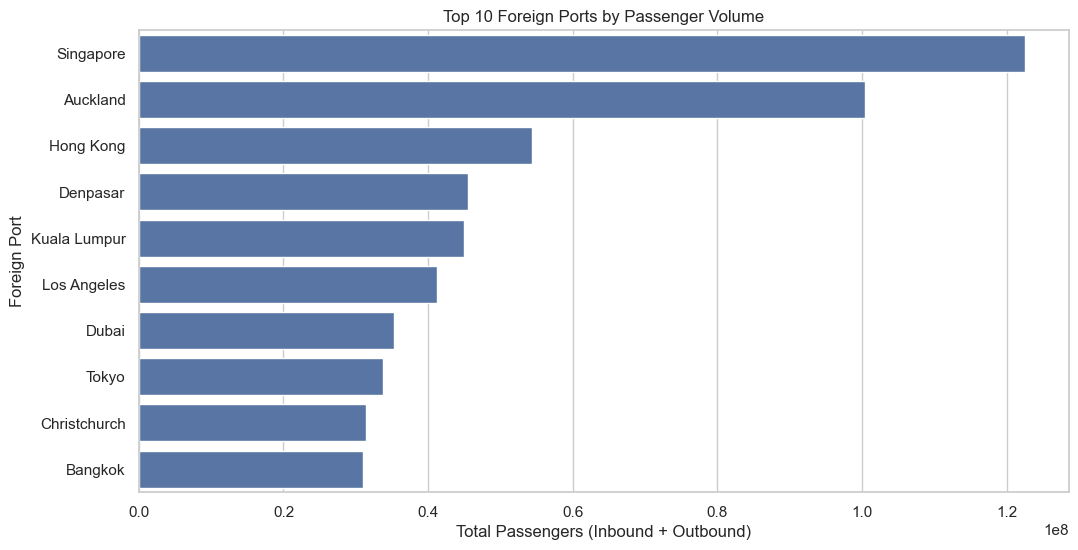

,ForeignPort,Passengers_In,Passengers_Out,Total_Passengers
173,Singapore,62436085,60055466,122491551
14,Auckland,49957939,50433863,100391802
78,Hong Kong,27687312,26633672,54320984
49,Denpasar,22755300,22730165,45485465
92,Kuala Lumpur,22973917,21956915,44930832
105,Los Angeles,20593952,20591263,41185215
54,Dubai,17912741,17430470,35343211
182,Tokyo,16824593,16901314,33725907
39,Christchurch,15744015,15605652,31349667
19,Bangkok,15941741,15096163,31037904


In [39]:
foreign_ports = df.groupby('ForeignPort')[['Passengers_In', 'Passengers_Out']].sum().reset_index()
foreign_ports['Total_Passengers'] = foreign_ports['Passengers_In'] + foreign_ports['Passengers_Out']
foreign_top10 = foreign_ports.sort_values(by='Total_Passengers', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Passengers', y='ForeignPort', data=foreign_top10)
plt.title('Top 10 Foreign Ports by Passenger Volume')
plt.xlabel('Total Passengers (Inbound + Outbound)')
plt.ylabel('Foreign Port')
plt.show()

foreign_top10

### Top 10 Routes (City Pairs) by Passenger Volume

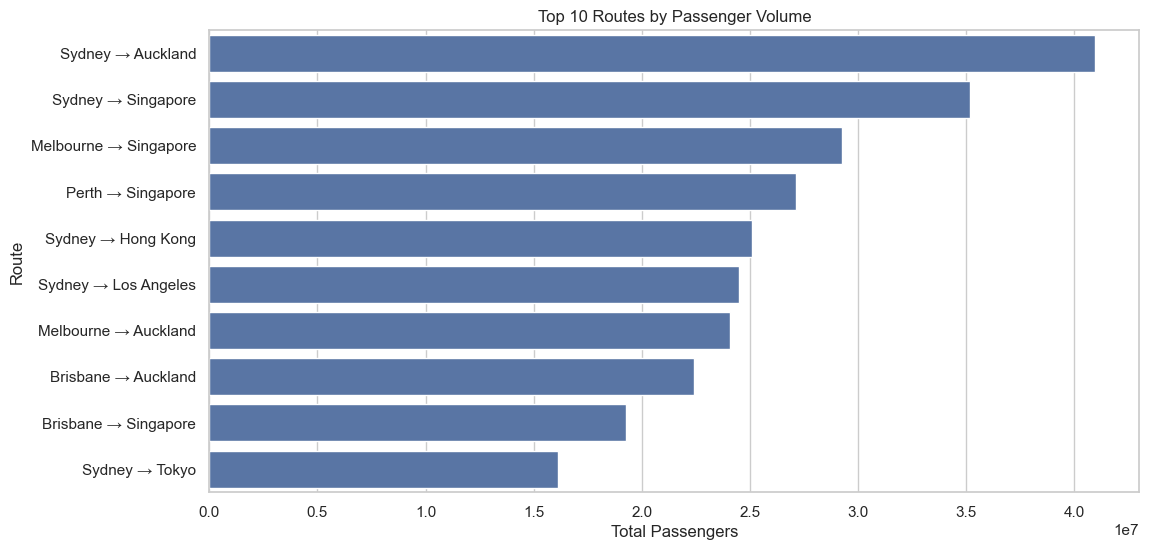

,Route,Passengers_Total
0,Sydney → Auckland,40969873
1,Sydney → Singapore,35183831
2,Melbourne → Singapore,29260667
3,Perth → Singapore,27149006
4,Sydney → Hong Kong,25100903
5,Sydney → Los Angeles,24519331
6,Melbourne → Auckland,24070445
7,Brisbane → Auckland,22435271
8,Brisbane → Singapore,19259891
9,Sydney → Tokyo,16139982


In [44]:
df['Route'] = df['AustralianPort'] + " → " + df['ForeignPort']

top_routes = (
    df.groupby('Route')['Passengers_Total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='Passengers_Total', y='Route')
plt.title('Top 10 Routes by Passenger Volume')
plt.xlabel('Total Passengers')
plt.ylabel('Route')
plt.show()

top_routes

### Market Share: Top 10 Countries as % of Total Passengers

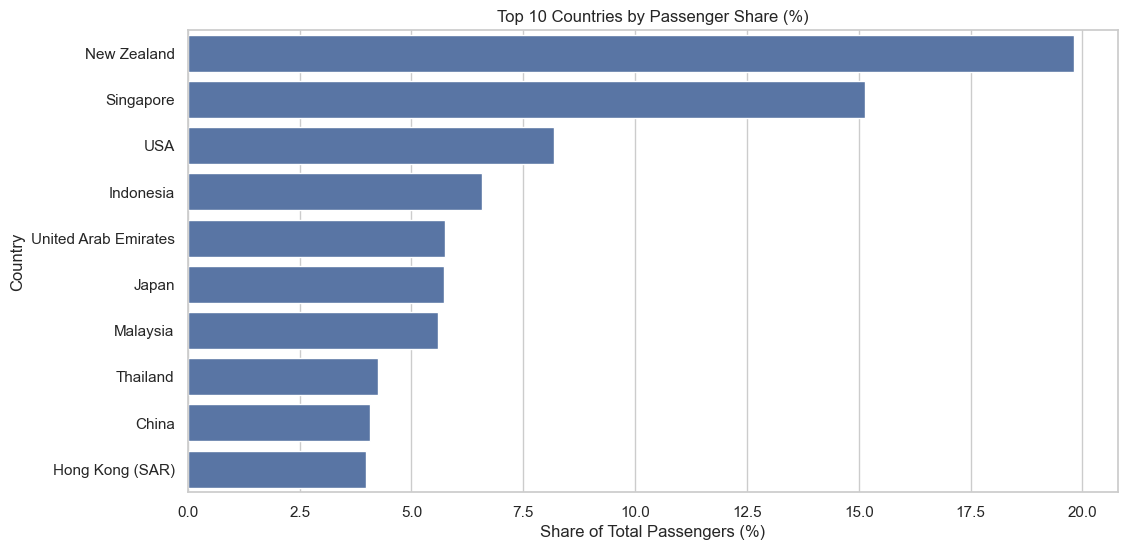

,Country,Passenger_Share_%
0,New Zealand,19.801652
1,Singapore,15.147577
2,USA,8.188295
3,Indonesia,6.580272
4,United Arab Emirates,5.759423
5,Japan,5.724906
6,Malaysia,5.589092
7,Thailand,4.261393
8,China,4.068389
9,Hong Kong (SAR),3.991212


In [46]:
country_totals = df.groupby('Country')['Passengers_Total'].sum().sort_values(ascending=False)
total = country_totals.sum()

share = (country_totals / total * 100).head(10).reset_index()
share.columns = ['Country', 'Passenger_Share_%']

plt.figure(figsize=(12, 6))
sns.barplot(data=share, x='Passenger_Share_%', y='Country')
plt.title('Top 10 Countries by Passenger Share (%)')
plt.xlabel('Share of Total Passengers (%)')
plt.ylabel('Country')
plt.show()

share

## 🛫 Port, Route, and Country-Level Traffic Analysis

### Overview

To understand how international traffic is distributed geographically, passenger volumes were analyzed at three levels: **Australian departure ports, foreign destination ports, and specific international routes**, as well as overall **country-level market share**. This multi-level approach reveals not only which cities dominate traffic but also how regional connectivity is structured within the international air network.

---

### Dominance of Major Australian Gateway Airports

Passenger traffic is highly concentrated among a small number of Australian airports. **Sydney is by far the dominant international gateway**, handling approximately **354 million passengers** over the analyzed period, which is almost double that of Melbourne and nearly three times that of Brisbane.

Melbourne follows with approximately **186 million passengers**, while Brisbane ranks third with around **122 million passengers**. Perth, although geographically isolated, still serves as a major western gateway with over **87 million passengers**, highlighting its importance for long-haul and Asia-bound routes.

In contrast, secondary airports such as **Cairns, Adelaide, Gold Coast, Darwin, and Norfolk Island** handle significantly lower volumes. These airports primarily support tourism-driven or region-specific travel rather than serving as major international hubs.

This distribution reflects a classic **hub-and-spoke structure**, where international connectivity is centralized in major metropolitan areas with strong population density, business activity, and airline infrastructure.

---

### Foreign Destination Hubs and Regional Connectivity

On the international side, passenger flows are also highly concentrated among a few major foreign airports. **Singapore ranks as the top foreign destination**, handling over **122 million passengers**, which emphasizes its role as a regional super-hub connecting Australia with Asia, Europe, and the Middle East.

**Auckland ranks second** with approximately **100 million passengers**, confirming the exceptionally strong travel relationship between Australia and New Zealand, driven by tourism, migration, education, and business ties.

Other major foreign hubs include:

* **Hong Kong**
* **Denpasar (Bali)**
* **Kuala Lumpur**
* **Los Angeles**
* **Dubai**
* **Tokyo**

These cities represent key global aviation nodes that function either as tourism destinations, business centers, or major transit hubs. Their strong presence indicates that Australia’s international connectivity is primarily oriented toward the **Asia–Pacific region**, with additional long-haul links to North America and the Middle East.

---

### Concentration of Passenger Traffic on Core Routes

Route-level analysis reveals that a small number of city pairs dominate international travel volumes.

The busiest route is **Sydney → Auckland**, with over **40 million passengers**, highlighting the intense bilateral travel demand between Australia and New Zealand. This is followed by:

* **Sydney → Singapore**
* **Melbourne → Singapore**
* **Perth → Singapore**
* **Sydney → Hong Kong**
* **Sydney → Los Angeles**

The repeated appearance of Singapore across multiple top routes indicates its central role as a **regional transfer hub** and major business destination. Auckland’s dominance reflects geographic proximity and frequent short-haul travel patterns.

Brisbane also plays an important role, particularly on trans-Tasman routes, confirming that international demand is not limited to only Sydney and Melbourne but extends to secondary metropolitan areas as well.

Overall, this shows that international passenger traffic is not evenly spread across routes, but instead heavily focused on a limited set of high-demand corridors.

---

### Country-Level Market Share and Regional Focus

Country-level passenger share further confirms the strong regional orientation of Australian international travel.

The largest shares are held by:

* **New Zealand (~19.8%)**
* **Singapore (~15.1%)**
* **United States (~8.2%)**
* **Indonesia (~6.6%)**
* **United Arab Emirates (~5.8%)**
* **Japan (~5.7%)**
* **Malaysia (~5.6%)**

Together, these countries account for a substantial majority of total international passenger traffic. This distribution indicates that Australian international aviation is strongly integrated with **Asia-Pacific economic and tourism networks**, while also maintaining important long-haul connections to North America and the Middle East.

European destinations, while present in the network, do not appear among the highest-volume individual countries, suggesting that long-haul travel to Europe is more fragmented across multiple destinations rather than concentrated in a single hub.

---

### Structural Interpretation of the Network

The combined port, route, and country analyses indicate that Australia’s international air traffic system exhibits:

* Strong **hub concentration** at major domestic airports
* Dependence on **regional super-hubs** such as Singapore and Hong Kong
* Heavy dominance of **short-to-medium haul international routes**, particularly within Asia and Oceania
* Selective long-haul connectivity focused on major global hubs (Los Angeles, Dubai)

This structure is consistent with airline network optimization strategies, where high-frequency service is concentrated on profitable, high-demand corridors while secondary routes are limited or seasonal.

---

### Impact of COVID-19 on Port and Route Networks

The sharp decline in passenger traffic observed in 2020–2021 affected not only total passenger volumes but also the **availability of routes and active international connections**. Many lower-volume routes were suspended entirely, while only core strategic routes were gradually restored during the recovery phase.

This led to a temporary but severe contraction of network diversity, reinforcing the dominance of major hubs during recovery and slowing the return of smaller international markets.

---

### Conclusions

The international air traffic network of Australia is characterized by strong geographic concentration, with traffic flowing primarily through a limited number of domestic gateway airports and foreign hub cities. Travel demand is dominated by Asia-Pacific connectivity, particularly with New Zealand and Southeast Asia, while intercontinental routes serve as strategic long-haul links rather than mass-market travel corridors.

The pandemic did not fundamentally alter this structure but temporarily compressed it, amplifying the role of major hubs while reducing access to smaller markets. As recovery continues, the gradual return of route diversity will be a key indicator of long-term aviation sector stabilization.

## Simple Anomalies Detection

### Correlation (Passengers vs Freight vs Mail)

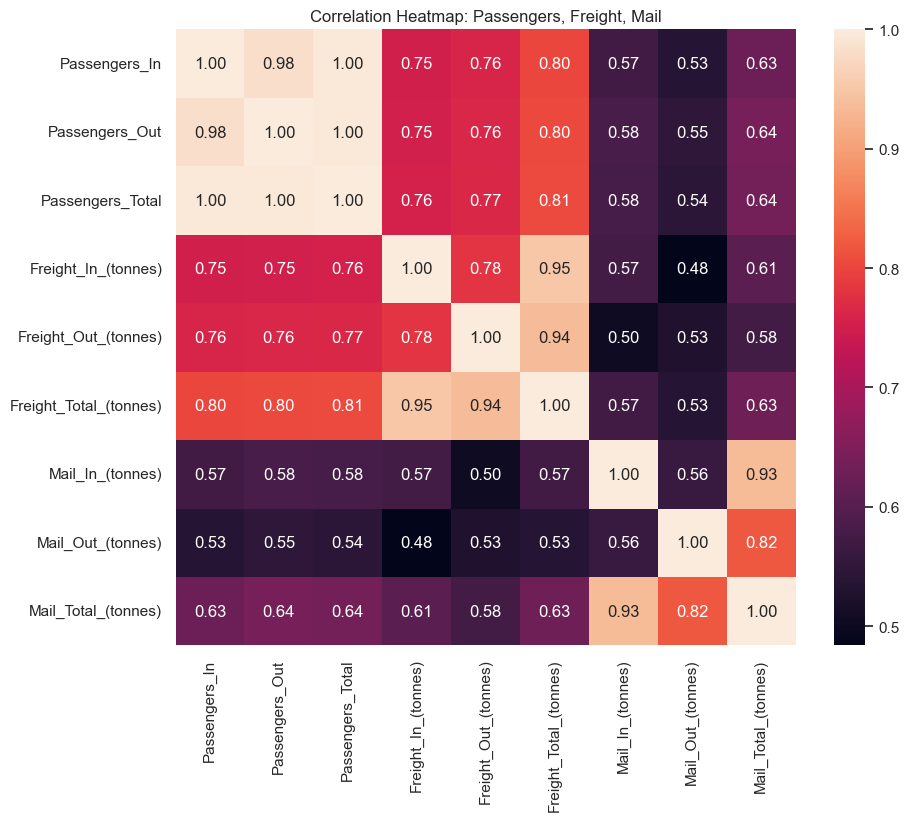

In [53]:
cols = [
    'Passengers_In','Passengers_Out','Passengers_Total',
    'Freight_In_(tonnes)','Freight_Out_(tonnes)','Freight_Total_(tonnes)',
    'Mail_In_(tonnes)','Mail_Out_(tonnes)','Mail_Total_(tonnes)'
]

corr = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap: Passengers, Freight, Mail")
plt.show()

### Outlier Detection (Big spikes)

In [54]:
monthly_total = df.groupby('Date', as_index=False)['Passengers_Total'].sum()
monthly_total['pct_change'] = monthly_total['Passengers_Total'].pct_change() * 100

# Top spikes up and down
top_up = monthly_total.sort_values('pct_change', ascending=False).head(10)
top_down = monthly_total.sort_values('pct_change', ascending=True).head(10)

display(top_up)
display(top_down)

,Date,Passengers_Total,pct_change
442,2021-11-01,156211,238.522050
443,2021-12-01,400757,156.548515
435,2021-04-01,112938,93.086116
436,2021-05-01,214246,89.702315
447,2022-04-01,1165779,66.990493
446,2022-03-01,698111,59.974106
450,2022-07-01,2057279,27.314905
222,2003-07-01,1421333,26.812453
449,2022-06-01,1615898,24.807332
425,2020-06-01,64835,22.355583


,Date,Passengers_Total,pct_change
423,2020-04-01,75306,-95.636279
439,2021-08-01,56357,-63.568252
422,2020-03-01,1725729,-38.486093
421,2020-02-01,2805429,-32.465225
424,2020-05-01,52989,-29.635089
440,2021-09-01,42149,-25.210710
433,2021-02-01,51613,-23.504565
481,2025-02-01,3348976,-23.399048
73,1991-02-01,617877,-23.103432
13,1986-02-01,411692,-22.292941


## 📈 Relationship Between Passengers, Freight, and Mail & Detection of Extreme Traffic Changes

### Overview

To better understand how different components of international air transport interact, correlation analysis was performed between **passenger volumes, freight tonnage, and mail transport**. In addition, monthly percentage changes in total passenger volume were analyzed to identify **extreme growth and decline events**, which help reveal periods of abnormal system behavior.

---

### Correlation Between Transport Modes

The correlation matrix reveals several important structural relationships:

#### Strong Internal Consistency Within Each Transport Type

* **Passenger metrics (Inbound, Outbound, Total)** are almost perfectly correlated (≈ 1.00), which confirms that:

  * Inbound and outbound movements scale together
  * Total passenger volume is a reliable summary of passenger activity

* **Freight metrics (Inbound, Outbound, Total)** also show very high correlation (≈ 0.94–0.95), indicating:

  * Symmetric trade flows
  * Stable cargo exchange mechanisms

* **Mail volumes (Inbound, Outbound, Total)** show strong internal relationships (≈ 0.82–0.93), suggesting consistent postal logistics patterns.

These strong within-category correlations indicate that each transport mode behaves as a coherent system.

---

#### Relationship Between Passengers and Freight

Passenger and freight variables show **moderate to strong correlations (≈ 0.75–0.81)**, meaning:

* When passenger travel increases, freight traffic usually increases as well
* Airlines likely utilize shared infrastructure and combined flight operations for both passengers and cargo

However, the correlation is not perfect, which indicates that:

* Freight demand is influenced by economic supply chains
* Passenger demand is driven more by tourism and social mobility

This partial decoupling explains why freight recovered more quickly than passengers during COVID-19 disruptions.

---

#### Relationship Between Mail and Other Transport Types

Mail volumes show **only moderate correlations (≈ 0.50–0.63)** with both passenger and freight traffic, suggesting:

* Postal logistics are partially independent of airline passenger demand
* Dedicated cargo services and ground transport likely supplement mail distribution

This indicates that mail transport is governed by logistical scheduling and communication needs rather than tourism or trade cycles alone.

---

### Analysis of Extreme Monthly Passenger Changes

Monthly percentage change analysis highlights periods of **exceptional disruption or recovery**, revealing system-level shocks.

#### Largest Monthly Increases

The largest positive growth rates occur mainly during **late 2021 and 2022**, including:

* November–December 2021: +156% to +239%
* Early and mid-2022: multiple months with +25% to +67%

These extreme growth rates represent:

* Border reopening phases
* Sudden return of international flights
* Restoration of suspended airline routes

Importantly, these spikes do not represent organic growth but rather **statistical rebounds from extremely low pandemic baselines**.

---

#### Largest Monthly Declines

The most severe declines occur during **early 2020**, including:

* April 2020: −95.6% (largest collapse)
* March–May 2020: multiple drops exceeding −30%

Additional declines appear in early 2021 and isolated earlier years, but none match the magnitude of the pandemic collapse.

These declines directly correspond to:

* Sudden international border closures
* Airline fleet groundings
* Suspension of most commercial international services

This confirms that COVID-19 represents the single largest structural disruption in the entire dataset.

---

### Structural Interpretation

The combined correlation and volatility analyses suggest:

* Passenger and freight systems are operationally linked but economically distinct
* Freight is more resilient to external shocks due to supply chain necessity
* Passenger travel is highly sensitive to regulatory and social restrictions
* Mail transport behaves semi-independently from both passenger and freight flows

The presence of synchronized collapse across all traffic categories during COVID-19 indicates that:

> Government policy interventions, rather than market demand, were the dominant force shaping air transport volumes during crisis periods.

---

### Implications for Aviation Resilience

These findings highlight important policy and industry implications:

* Airlines with diversified cargo operations are more resilient to passenger demand shocks
* Infrastructure planning must consider both passenger and logistics demand streams
* Crisis preparedness strategies should prioritize freight continuity even when tourism collapses

Understanding these interdependencies is critical for designing **robust international transport systems** capable of withstanding future global disruptions.
